# Real-World Project 2

Begin this project in Week 5 and turn it in for feedback in Discussions by Sunday (11:59 PM) in Week 6. Respond to two of your colleagues by Thursday (11:59 PM) of Week 7 and finally turn in your project on Sunday (11:59 PM) of week 7.

If you are working in Google Colab, you will need to upload your data files, using the file icon on the left. If you are working in Jupyter Lab, be sure your data files are in the folder that you are using.

Note that in this Jupyter notebook, I have included some figures. If you click on the figure, it will look like a *very* long list of characters. Just go back out of editing mode to see the picture.




In [1]:
# Basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import ticker

# Display options
from IPython.display import display
pd.options.display.max_columns = None

np.set_printoptions(threshold=30)

# Plots style
from cycler import cycler

matplotlib.rcParams['lines.linewidth'] = 3
matplotlib.rcParams['lines.markersize'] = 10

matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['xtick.color'] = '#A9A9A9'
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['ytick.color'] = '#A9A9A9'

matplotlib.rcParams['grid.color'] = '#ffffff'

matplotlib.rcParams['axes.facecolor'] = '#ffffff'

matplotlib.rcParams['axes.spines.left'] = False
matplotlib.rcParams['axes.spines.right'] = False
matplotlib.rcParams['axes.spines.top'] = False
matplotlib.rcParams['axes.spines.bottom'] = False

matplotlib.rcParams['axes.prop_cycle'] = cycler(color=['#2EBCE7', '#84EE29', '#FF8177'])

# Food Data

Let’s use least squares approximation with real data: the CIQUAL dataset on food
composition (french Agency for Food, Environmental and Occupational
Health & Safety. ANSES-CIQUAL French food composition table version
2017. Check out this website to better understand the dataset: https://ciqual.anses.fr/) .

I'll use the normal equation to model the relationship between the
amount of phosphorus and zinc in vegetables and legumes.

Let’s start by loading the data. 

Also, we'll look at the first few entries in the dataset.

In [5]:
# Load the data
#data = pd.read_csv("ciqual.csv", sep=";", encoding="latin9", na_values=['-', 'NaN'])
data = pd.read_csv("ciqual.csv", sep=";", encoding="latin9", na_values=['-', 'NaN'])
#The following code shows the first 7 lines of the dataset along with the headings.
# It helps you see what you are dealing with.
data.head(7)

,alim_grp_code,alim_ssgrp_code,alim_ssssgrp_code,alim_grp_nom_eng,alim_ssgrp_nom_eng,alim_ssssgrp_nom_eng,alim_code,alim_nom_eng,alim_nom_eng.1,Energy. Regulation EU No 1169/2011 (kcal/100g),Energy. N x Jones' factor. with fibres (kJ/100g),Energy. N x Jones' factor. with fibres (kcal/100g),Water (g/100g),Protein (g/100g),Protein. crude. N x 6.25 (g/100g),Carbohydrate (g/100g),Fat (g/100g),Sugars (g/100g),Starch (g/100g),Fibres (g/100g),Polyols (g/100g),Ash (g/100g),Alcohol (g/100g),Organic acids (g/100g),FA saturated (g/100g),FA mono (g/100g),FA poly (g/100g),FA 4:0 (g/100g),FA 6:0 (g/100g),FA 8:0 (g/100g),FA 10:0 (g/100g),FA 12:0 (g/100g),FA 14:0 (g/100g),FA 16:0 (g/100g),FA 18:0 (g/100g),FA 18:1 n-9 cis (g/100g),FA 18:2 9c.12c (n-6) (g/100g),FA 18:3 c9.c12.c15 (n-3) (g/100g),FA 20:4 5c.8c.11c.14c (n-6) (g/100g),FA 20:5 5c.8c.11c.14c.17c (n-3) EPA (g/100g),FA 22:6 4c.7c.10c.13c.16c.19c (n-3) DHA (g/100g),Cholesterol (mg/100g),Salt (g/100g),Calcium (mg/100g),Chloride (mg/100g),Copper (mg/100g),Iron (mg/100g),Iodine (µg/100g),Magnesium (mg/100g),Manganese (mg/100g),Phosphorus (mg/100g),Potassium (mg/100g),Selenium (µg/100g),Sodium (mg/100g),Zinc (mg/100g),Retinol (µg/100g),Beta-carotene (µg/100g),Vitamin D (µg/100g),Vitamin E (mg/100g),Vitamin K1 (µg/100g),Vitamin K2 (µg/100g),Vitamin C (mg/100g),Vitamin B1 or Thiamin (mg/100g),Vitamin B2 or Riboflavin (mg/100g),Vitamin B3 or Niacin (mg/100g),Vitamin B5 or Pantothenic acid (mg/100g),Vitamin B6 (mg/100g),Vitamin B9 or Folate (µg/100g),Vitamin B12 (µg/100g)
0,1,101,0,starters and dishes,mixed salads,NaN,25600,Celeriac in remoulade sauce. prepacked,Celeriac in remoulade sauce. prepacked,NaN,NaN,NaN,78.5,1.12,1.12,4.19,12.8,2.38,1.3,2.87,0,1.59,0,NaN,1.08,7.73,3.67,< 0.05,< 0.05,< 0.05,< 0.05,< 0.05,0.013,0.66,0.22,4.64,1.69,1.03,NaN,NaN,< 0.01,0.1,1,28.6,616,0.069,0.29,2,12,0.11,35,315,< 10,395,0.22,< 2,< 8,< 0.5,3.4,NaN,NaN,25.2,< 0.04,< 0.04,0.38,0.28,0.19,28,< 0.08
1,1,101,0,starters and dishes,mixed salads,NaN,25601,Prepared mixed tuna and vegetable salad. canne...,Prepared mixed tuna and vegetable salad. canne...,NaN,NaN,NaN,76.5,9.15,9.15,7.74,4.7,3.08,4.1,2.7,0,1.79,0,NaN,0.56,1.83,1.76,< 0.05,< 0.05,< 0.05,< 0.05,< 0.05,0.008,0.38,0.12,NaN,1.15,0.056,NaN,0.008,0.039,19.2,1.11,20.7,731,0.1,1.1,2,25.1,0.1,88.4,232,NaN,445,0.6,< 2,NaN,< 0.5,1.6,NaN,NaN,2.75,< 0.04,0.053,4.45,< 0.16,0.29,31,1.45
2,1,101,0,starters and dishes,mixed salads,NaN,25602,Prepared mixed meat/fish canned. drained salad,Prepared mixed meat/fish canned. drained salad,NaN,NaN,NaN,76.7,8.06,8.06,6.4,5.3,1.9,3.3,2,0,1.5,0,NaN,0.16,3.27,1.54,< 0.01,< 0.01,< 0.01,< 0.01,< 0.01,< 0.01,0.12,0.04,2.24,1.08,0.28,0.016,0.016,0.15,15.2,0.95,22,584,0.07,0.7,< 20,20,0.1,92,220,30,381,0.38,< 21,781,0.44,2.04,9.75,NaN,NaN,0.032,0.022,4.13,0.2,0.12,11.1,1.23
3,1,101,0,starters and dishes,mixed salads,NaN,25605,Greek-style marinated mushrooms,Greek-style marinated mushrooms,NaN,NaN,NaN,84.6,2.08,2.08,3.95,3.55,2.38,0.28,2.35,0,1.64,0,NaN,0.23,1.74,1.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.026,NaN,NaN,NaN,0.11,1.26,22.6,NaN,0.17,0.58,1.91,13.8,0.13,52.2,292,1.79,500,0.39,0,747,0,1.47,NaN,NaN,10.3,0.062,0.2,1.88,0.76,0.11,27.3,0.018
4,1,101,0,starters and dishes,mixed salads,NaN,25606,Prepared potatoes salad. home-made,Prepared potatoes salad. home-made,NaN,NaN,NaN,76,2.68,2.68,9.9,8.2,NaN,NaN,1.3,0,1.95,0,NaN,1.43,2.48,3.74,NaN,NaN,NaN,0,0.011,0.013,1.03,0.37,NaN,NaN,NaN,NaN,NaN,NaN,68,1.33,19,NaN,0.12,0.65,NaN,15,0.1,52,254,NaN,529,0.31,29,36,0,NaN,NaN,NaN,10,0.077,0.06,0.89,0.53,0.14,7,0
5,1,101,0,starters and dishes,mixed salads,NaN,25608,Tabbouleh. prepacked,Tabbouleh. prepacked,NaN,NaN,NaN,66.4,4.29,4.29,22.2,5.65,3.82,13,2.27,0,1.23,0,NaN,0.6,3.3,1.27,< 0.05,< 0.05,< 0.05,< 0.05,< 0.05,0.005,0.38,0.11,NaN,1.03,0.23,< 0.0026,< 0.0026,< 0.0026,0.1,0.91,19.9,NaN,0.12,0.72,2,27.1,0.3,66.5,207,< 10,355,0.46,0,NaN,0,1.68,NaN,NaN,14.5,0.09,0.04,0.83,NaN,0.09,17,0
6,1,101,0,starters and dishes,mixed salads,NaN,25609,Po

Let's look at the data more closely. This gives the count of entries, number of columns, number of non-null entries in each column and their data type.

In [6]:
# Some initial exploration of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2807 entries, 0 to 2806
Data columns (total 69 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   alim_grp_code                                       2807 non-null   int64  
 1   alim_ssgrp_code                                     2807 non-null   int64  
 2   alim_ssssgrp_code                                   2807 non-null   int64  
 3   alim_grp_nom_eng                                    2796 non-null   object 
 4   alim_ssgrp_nom_eng                                  2796 non-null   object 
 5   alim_ssssgrp_nom_eng                                1764 non-null   object 
 6   alim_code                                           2807 non-null   int64  
 7   alim_nom_eng                                        2806 non-null   object 
 8   alim_nom_eng.1                                      2806 non-null   object 
 9

Let’s remove non-numeric characters in the data and convert the columns
to numeric type.

In [7]:
data = data.replace("< ", "", regex=True).replace('traces', 0)
cols = data.loc[:, data.columns != 'alim_ssssgrp_nom_eng'].columns
data[cols] = data[cols].apply(pd.to_numeric, errors='coerce')

Now, you’ll select only part of the dataset you’ll need for the linear
regression. Then, remove the missing values:

In [8]:
food = ['vegetables. raw',
       'vegetables. cooked', 'vegetables. dried or dehydrated',
       'legumes. cooked', 'legumes. raw', 'legumes. dried',
       'fresh fruits']

data = data[['alim_ssssgrp_nom_eng', "Phosphorus (mg/100g)", "Zinc (mg/100g)"]]
data = data[(data['alim_ssssgrp_nom_eng'].isin(food))]

data = data.dropna()

data

,alim_ssssgrp_nom_eng,Phosphorus (mg/100g),Zinc (mg/100g)
308,vegetables. raw,44.4,0.460
309,vegetables. raw,10.0,0.070
310,vegetables. raw,32.7,0.220
311,vegetables. raw,85.6,0.650
312,vegetables. raw,37.5,0.610
...,...,...,...
659,fresh fruits,19.0,0.130
660,fresh fruits,17.0,0.080
661,fresh fruits,9.8,0.050
662,fresh fruits,15.8,0.086


# ******
Now, let’s visualize a scatter plot of the amount of zinc as a function
of the amount of phosphorus (Figure
[156](#fig:ch09_output_zinc_phosphorus)):

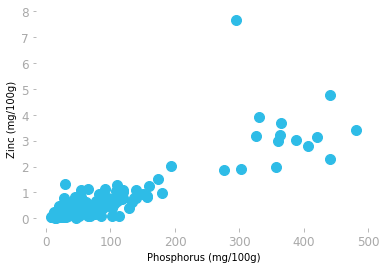

In [9]:
plt.scatter(data["Phosphorus (mg/100g)"], data["Zinc (mg/100g)"])
# [...] Add labels

plt.xlabel("Phosphorus (mg/100g)")
plt.ylabel("Zinc (mg/100g)")
plt.show()



Figure 3: Amount of zinc as a function of the amount of phosphorus.

You can then create the matrix and vectors corresponding to the equation
$ A {\bf x} = {\bf b}$ (the function `to_numpy()` allows you to convert Pandas
Series to Numpy arrays):

In [10]:
x = data["Phosphorus (mg/100g)"].to_numpy()
b = data["Zinc (mg/100g)"].to_numpy()

A = np.array([x, np.ones(x.shape[0])]).T
A

array([[44.4,  1. ],
       [10. ,  1. ],
       [32.7,  1. ],
       ...,
       [ 9.8,  1. ],
       [15.8,  1. ],
       [32.6,  1. ]])

Now, use the normal equation to calculate $\hat{x}$:

In [11]:
x_hat = np.linalg.inv(A.T @ A) @ A.T @ b
x_hat

array([ 0.0084948 , -0.05865873])

You can check that it works by plotting the regression line:

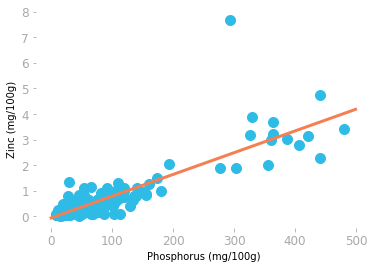

In [12]:
# Regression line representing the relationship between amount of zinc and phosphorus.
x_axis = np.arange(0, 500)
y_line = x_hat[0] * x_axis + x_hat[1]

plt.scatter(data["Phosphorus (mg/100g)"].to_numpy(), data["Zinc (mg/100g)"].to_numpy())
plt.plot(y_line, c="#F57F53")
# [...] Add labels

plt.xlabel("Phosphorus (mg/100g)")
plt.ylabel("Zinc (mg/100g)")
plt.show()




You can see in Figure above
that the line fits the data well.

Now that you have the regression line, now I'll explain the meaning of it relative to the elements: alim_ssssgrp_nom_eng	Phosphorus (mg/100g)	Zinc (mg/100g). I'll do this byCompute the correlation and compare and contrast it with what you see in the above scatterplot with the regression line passing through it.

# Answer Question 5 here.
y = 0.0084948𝑥 + 0.05865873

Looking at the data, we can see that for each 1 mg/100g increase in Phosphorus, Zinc increases by an average of 0.0085 mg/100g across the various food subgroups in the alim_ssssgrp_nom_eng variable.
Furthermore, the regression line provides solid proof for predicting the amount of Zinc in foods based on their Phosphorus content.
The correlation of 0.86 shows a strong positive connection between Phosphorus and Zinc. This means that, generally speaking, as the Phosphorus content rises, so does the Zinc level. The plot shows with most data points closely following the regression line it states the idea that more Phosphorus usually means more Zinc.


# Question 6

Multiple linear regression. This time, choose 3 new elements of the dataset ciqual.csv. Two independent variables an one dependent variable. The idea is to use the two independent variables to predict the value of the dependent variable.

The regression model is a plane. Find (and display) the formula for the regression plane.


Complete all of the above steps to find and plot the linear regression model (which will be a plane) of the data, graph the scatterplot in three dimentions with the plane  and finally, draw a conclusion about your result.

You might want to [watch this video first](https://youtu.be/xVgqM35YSDY).

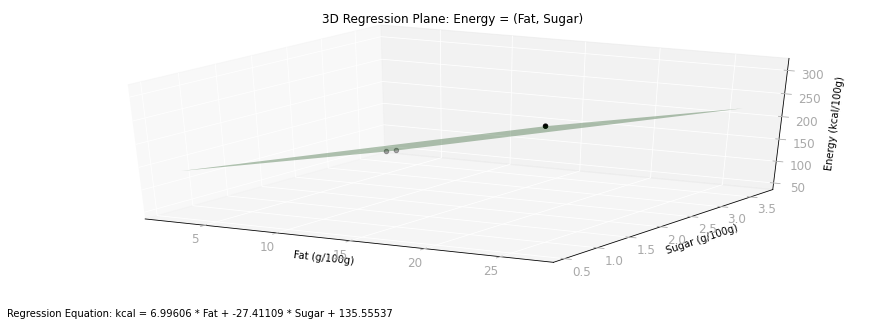

Regression Equation: kcal = 6.99606 * Fat + -27.41109 * Sugar + 135.55537


In [13]:
from sklearn.linear_model import LinearRegression

# Load the dataset
project2 = pd.read_csv("ciqual.csv", sep=";", encoding="latin9", na_values=['-', 'NaN'])
project2 = project2.rename(columns={
    'Fat (g/100g)': 'Fat',
    'Sugars (g/100g)': 'Sugar',
    'Energy. Regulation EU No 1169/2011 (kcal/100g)': 'kcal'
})

# Convert non-numeric columns to numeric
project2['Fat'] = pd.to_numeric(project2['Fat'], errors='coerce')
project2['Sugar'] = pd.to_numeric(project2['Sugar'], errors='coerce')
project2['kcal'] = pd.to_numeric(project2['kcal'], errors='coerce')

# Drop rows with non-numeric values
project2 = project2.dropna()

# Extract independent (X) and dependent (y) variables
X = project2[['Fat', 'Sugar']].values  # Independent variables (Fat and Sugar)
y = project2['kcal'].values  # Dependent variable (Energy/kcal)

# Fit the multiple linear regression model
regressor = LinearRegression()
regressor.fit(X, y)

# Get the coefficients of the plane
coefficients = regressor.coef_
intercept = regressor.intercept_

# Display the regression plane equation
regression_equation = f"kcal = {coefficients[0]:.5f} * Fat + {coefficients[1]:.5f} * Sugar + {intercept:.5f}"

# Create a 3D plot for the regression plane
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
ax.scatter(project2['Fat'], project2['Sugar'], project2['kcal'], color='black', label='Data Points')

# Generate a grid for the plane
fat1 = np.linspace(project2['Fat'].min(), project2['Fat'].max(), 100)
sugar1 = np.linspace(project2['Sugar'].min(), project2['Sugar'].max(), 100)
fat_grid, sugar_grid = np.meshgrid(fat1, sugar1)

# Calculate the predicted energy for the grid
kcal_grid = (coefficients[0] * fat_grid + coefficients[1] * sugar_grid + intercept)

# Plot the regression plane
ax.plot_surface(fat_grid, sugar_grid, kcal_grid, color='green', alpha=0.3, rstride=100, cstride=100)

# Set plot labels and title
ax.set_xlabel('Fat (g/100g)')
ax.set_ylabel('Sugar (g/100g)')
ax.set_zlabel('Energy (kcal/100g)')
ax.set_title('3D Regression Plane: Energy = (Fat, Sugar)')

# Display the regression equation
plt.figtext(0.1, 0.02, f"Regression Equation: {regression_equation}", fontsize=10)
plt.show()

# Display the regression equation
print(f"Regression Equation: {regression_equation}")

In [14]:
### The linear regression model and correlation analysis, we can say that both fat and sugar tend to increase the energy (kcal) content of food. 
### The strength of this relationship is measured by the regression coefficients and correlation values. This means that if you want to create foods with higher kcal content, 
### focusing on increasing fat or sugar would raise the kcals.
### Also, another conculsion I've drawn was that Fat and kcal: show the correlation between Fat and kcal is high, it suggests that foods with more fat contribute more to the total energy (kcal).
### Furthermore, Sugar and kcal: Similarly, have a high correlation between Sugar and kcal suggests that foods with higher sugar content also contribute more energy as well. Both have high correlation to kcals. 
